# Práctica 3
### Ejercicio: Reconstruir usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
original_image = plt.imread('imagen_muestra.png')
print("Dimensiones imagen original: {}".format(original_image.shape))
original_image = original_image[:,:,0]

Dimensiones imagen original: (1001, 1419, 3)


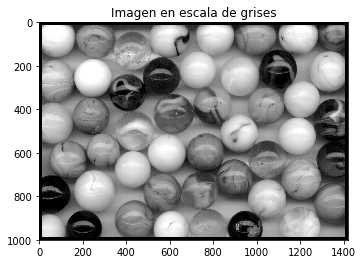

In [16]:
plt.imshow(original_image, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

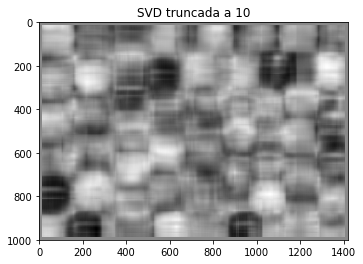

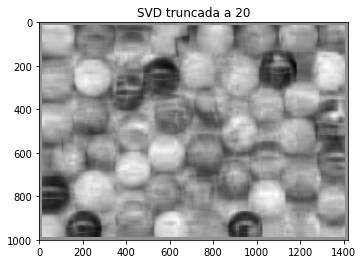

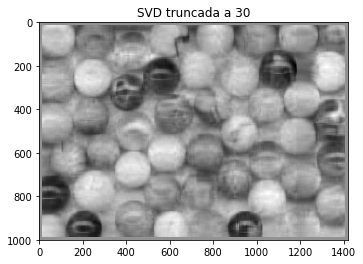

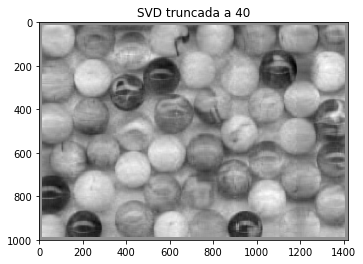

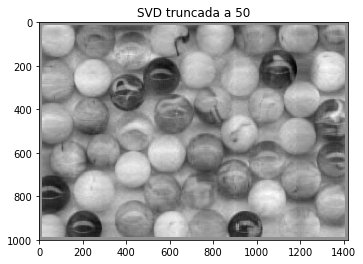

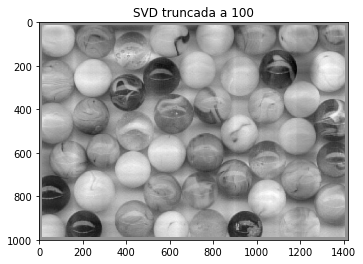

In [20]:
#calcular U, S y V^T
U,S,V_T = np.linalg.svd(original_image, full_matrices=False)


#Solución recursiva... No sé si esto es óptimo o si conviene iterar.    
def reconstruir_imagen_con_n(n, i=1, img=0):
    if i == n:
        return img
    else:
        return img + reconstruir_imagen_con_n(n, i+1,np.outer((U[:,i]*S[i]),V_T[i,:]))

#solución con ciclos
def reconstruir_imagen_con_n_loop(n, img=0):
    for i in range(1,n+1):
        img += np.outer((U[:,i]*S[i]),V_T[i,:])
    return img

def mostrar_imagen_con_n_vec_sing(n):
    plt.imshow(reconstruir_imagen_con_n(n), cmap='gray') #vamos a usar la recuriva
    plt.title('SVD truncada a {}'.format(n))
    plt.show()


mostrar_imagen_con_n_vec_sing(10)
mostrar_imagen_con_n_vec_sing(20)
mostrar_imagen_con_n_vec_sing(30)
mostrar_imagen_con_n_vec_sing(40)
mostrar_imagen_con_n_vec_sing(50)
mostrar_imagen_con_n_vec_sing(100)